Packages.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/12_2_Logistic_Bayes.ipynb)

In [1]:

!pip install bambi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00


In [2]:
import bambi as bmb
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures


The loan data set has information from loan applications along with whether or not the loan was accepted.

In [9]:
loan = pd.read_csv("https://richardson.byu.edu/220/loan.csv").dropna()
loan

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Yes,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,Yes,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,Yes,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,No,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,Yes,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
485,No,Graduate,No,2900,0.0,71,360,1,Rural,Y
486,Yes,Graduate,No,4106,0.0,40,180,1,Rural,Y
487,Yes,Graduate,No,8072,240.0,253,360,1,Urban,Y
488,Yes,Graduate,No,7583,0.0,187,360,1,Urban,Y


Build a standard logistic regression model for the data.

In [10]:
# Get the target variable
y = (loan.Loan_Status == "Y")
# Get the predictors ready
X = pd.get_dummies(loan.drop(columns = ["Loan_Status"]),drop_first = True)

# Scale the data
scale_for_X = StandardScaler()
scale_for_X.fit(X)
scaled_X = scale_for_X.transform(X)
scaled_X = pd.DataFrame(scaled_X,columns = X.columns)

# fit a logistic regression model
mod = LogisticRegression()
mod.fit(scaled_X,y)

# check the accuracy
mod.score(scaled_X,y)

0.8142857142857143

In [11]:
mod.predict_proba(scaled_X)

array([[0.19335502, 0.80664498],
       [0.18602015, 0.81397985],
       [0.26812647, 0.73187353],
       [0.29629771, 0.70370229],
       [0.31534197, 0.68465803],
       [0.24894504, 0.75105496],
       [0.80908696, 0.19091304],
       [0.20252273, 0.79747727],
       [0.20159034, 0.79840966],
       [0.15884811, 0.84115189],
       [0.26548946, 0.73451054],
       [0.32238545, 0.67761455],
       [0.11248129, 0.88751871],
       [0.28866695, 0.71133305],
       [0.92990348, 0.07009652],
       [0.26502768, 0.73497232],
       [0.91960175, 0.08039825],
       [0.30602694, 0.69397306],
       [0.85375091, 0.14624909],
       [0.12007448, 0.87992552],
       [0.09321259, 0.90678741],
       [0.25076935, 0.74923065],
       [0.33861819, 0.66138181],
       [0.26309611, 0.73690389],
       [0.33901195, 0.66098805],
       [0.08909263, 0.91090737],
       [0.43968957, 0.56031043],
       [0.09520518, 0.90479482],
       [0.38913188, 0.61086812],
       [0.22649868, 0.77350132],
       [0.

In [12]:
np.mean((mod.predict_proba(scaled_X)[:,1] > 0.5) == y)

0.8142857142857143

Now we fit a model with higher order terms

In [51]:
mod_temp = sm.Logit(y,sm.add_constant(scaled_X)).fit()

mod_temp.summary()

Optimization terminated successfully.
         Current function value: 0.454268
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  490
Model:                          Logit   Df Residuals:                      479
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2702
Time:                        17:49:56   Log-Likelihood:                -222.59
converged:                       True   LL-Null:                       -305.02
Covariance Type:            nonrobust   LLR p-value:                 3.219e-30
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8594      0.126      6.847      0.000       0.613       1.105
ApplicantIncome             0.0439      0.167      0.264      0.792      -0.283       0.370
CoapplicantIncome          -0.1025      0.109     -0.944      0.345      -0.315       0.110
LoanAmount                 -0.2265      0.144     -1.568      0.117      -0.510       0.057
Loan_Amount_Term           -0.0780      0.131     -0.594      0.553      -0.335       0.179
Credit_History              1.3318      0.153      8.690      0.000       1.031       1.632
Married_Yes                 0.3194      0.120      2.658      0.008       0.084       0.555
Education_Not Graduate     -0.1884      0.120     -1.573      0.116      -0.423       0.046
Self_Employed_Yes          -0.0799      0.117     -0.680      0.496      -0.310       0.150
Property_Area_Semiurban     0.4371      0.146      2.998      0.003       0.151       0.723
Property_Area_Urban         0.0285      0.136      0.210      0.834      -0.238       0.295
===========================================================================================
"""

In [52]:
X_temp = sm.add_constant(scaled_X)

# Itertatively remove the largest p value 1 at a time
while max(mod_temp.pvalues) > 0.05 and (len(X_temp.columns) > 1):
  max_pvalue = np.argmax(mod_temp.pvalues[1:])+1
  X_temp = X_temp.drop(columns = X_temp.columns[max_pvalue])
  mod_temp = sm.Logit(y,X_temp).fit()

mod_reduced = mod_temp

# View the final model summary
mod_reduced.summary()

Optimization terminated successfully.
         Current function value: 0.454313
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454385
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454802
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.455213
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.456269
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458625
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.461825
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  490
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2581
Time:                        17:50:09   Log-Likelihood:                -226.29
converged:                       True   LL-Null:                       -305.02
Covariance Type:            nonrobust   LLR p-value:                 6.512e-34
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8372      0.124      6.776      0.000       0.595       1.079
Credit_History              1.3343      0.153      8.737      0.000       1.035       1.634
Married_Yes                 0.2683      0.115      2.335      0.020       0.043       0.494
Property_Area_Semiurban     0.4202      0.127      3.319      0.001       0.172       0.668
===========================================================================================
"""

Now we want to fit a Bayes model with these variables. First let's make a new data set with the predictors and the target.

In [65]:
df = X_temp.copy().drop(columns = "const")
df["y"] = y

We will try using a trick for getting the formula for the Bayesian model.

In [67]:
def create_bambi_formula(df, response_var):
    # Get all column names excluding the response variable
    predictors = df.columns[df.columns != response_var]

    # Handle special characters in column names (e.g., spaces, %, etc.)
    predictors = [f"`{col}`" if not col.isidentifier() else col for col in predictors]

    # Join all predictors into a formula string
    formula = f"{response_var} ~ " + " + ".join(predictors)
    return formula

formula = create_bambi_formula(df, "y")
formula

'y ~ Credit_History + Married_Yes + Property_Area_Semiurban'

In [60]:
mod_bayes = bmb.Model(formula,df,family = "bernoulli")
results = mod_bayes.fit(draws=200, chains=2)


Output()

Output()

Priors

In [68]:
priors = {var:bmb.Prior("Normal",mu = 0,sigma = 1) for var in df.columns}
priors["Intercept"] = bmb.Prior("Normal",mu = 0,sigma = 1)
del priors["y"]
priors

{'Credit_History': Normal(mu: 0.0, sigma: 1.0),
 'Married_Yes': Normal(mu: 0.0, sigma: 1.0),
 'Property_Area_Semiurban': Normal(mu: 0.0, sigma: 1.0),
 'Intercept': Normal(mu: 0.0, sigma: 1.0)}

Fit the Bayes model and view the results.

In [ ]:
mod_bayes = bmb.Model(formula,df)
mod_bayes.set_priors(priors=priors)
results = mod_bayes.fit(draws=200, chains=2)
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.136,0.047,0.047,0.223,0.001,0.001,3376.0,1579.0,1.0
Loan_Amount_Term,-0.093,0.028,-0.145,-0.040,0.001,0.000,2228.0,1685.0,1.0
ApplicantIncome LoanAmount,-0.014,0.007,-0.027,-0.000,0.000,0.000,3350.0,1793.0,1.0
ApplicantIncome Loan_Amount_Term,-0.073,0.021,-0.111,-0.035,0.000,0.000,3130.0,1483.0,1.0
CoapplicantIncome^2,-0.006,0.002,-0.011,-0.002,0.000,0.000,3871.0,1793.0,1.0
CoapplicantIncome LoanAmount,-0.030,0.013,-0.054,-0.006,0.000,0.000,3495.0,1393.0,1.0
Loan_Amount_Term^2,-0.030,0.010,-0.050,-0.013,0.000,0.000,2215.0,1542.0,1.0
Education_Not GraduateCoapplicantIncome,0.174,0.077,0.045,0.336,0.001,0.001,3643.0,1330.0,1.0
Self_Employed_YesLoanAmount,0.073,0.038,-0.003,0.142,0.001,0.001,3893.0,1821.0,1.0
Credit_History_1,0.654,0.050,0.558,0.745,0.001,0.001,3409.0,1545.0,1.0


Make predictions. These are the means of the probabilities of acceptance.

In [83]:
mod_bayes.predict(results)
results.posterior.p[0,:,0]

<xarray.DataArray 'y' (draw: 200)> Size: 2kB
array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1])
Coordinates:
    chain    int64 8B 0
  * draw     (draw) int64 2kB 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
    __obs__  int64 8B 0

In [74]:
mod_bayes.predict(results)
pred_array = np.array(results.posterior.p)
#print(pred_array.mean(axis = (0,1))) # mean prediction for all 490 points
print(pred_array[0,0,:])

[0.73310272 0.73310272 0.73310272 0.7202192  0.73310272 0.73310272
 0.07500987 0.73310272 0.83698104 0.73310272 0.73310272 0.7202192
 0.73310272 0.7202192  0.03906991 0.73310272 0.04157962 0.73310272
 0.07500987 0.83698104 0.83698104 0.73310272 0.7202192  0.7202192
 0.7202192  0.83698104 0.7202192  0.83698104 0.7202192  0.82793497
 0.7202192  0.7202192  0.83698104 0.73310272 0.73310272 0.04157962
 0.82793497 0.83698104 0.82793497 0.82793497 0.73310272 0.04157962
 0.83698104 0.83698104 0.73310272 0.73310272 0.73310272 0.73310272
 0.73310272 0.04157962 0.07063104 0.83698104 0.03906991 0.73310272
 0.73310272 0.07063104 0.73310272 0.83698104 0.82793497 0.83698104
 0.7202192  0.7202192  0.73310272 0.07500987 0.82793497 0.73310272
 0.73310272 0.82793497 0.83698104 0.7202192  0.83698104 0.83698104
 0.83698104 0.73310272 0.82793497 0.82793497 0.83698104 0.83698104
 0.83698104 0.83698104 0.73310272 0.82793497 0.73310272 0.73310272
 0.04157962 0.83698104 0.7202192  0.73310272 0.83698104 0.733102

In [75]:
(pred_array.mean(axis = (0,1)) > 0.5)

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [76]:
np.mean((pred_array.mean(axis = (0,1)) > 0.5) == y)

0.810204081632653

Examine the histogram of the posterior predicted mean distribution for just one of the variables.

(array([ 1.,  0.,  7.,  6., 19., 47., 38., 46., 27.,  9.]),
 array([0.79387138, 0.80898506, 0.82409873, 0.83921241, 0.85432609,
        0.86943976, 0.88455344, 0.89966712, 0.91478079, 0.92989447,
        0.94500815]),
 <BarContainer object of 10 artists>)

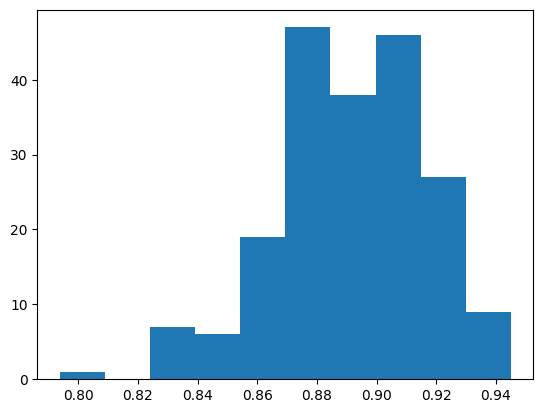

In [77]:
plt.hist(pred_array[0,:,101])

In [78]:
np.quantile(pred_array[0,:,103],[.025,.975])

array([0.71213689, 0.83086525])

In [79]:
np.mean(pred_array[0,:,103])

0.776236869935207

In [80]:
y[103]

1